# ATPY User Muanual

ATPY(Accelerator Tools on PYthon)是以C++实现内核、cython作为接口、python下调用的加速器模拟工具包，主要包含以下功能：

1. 快速计算工具


## features introduction
### parameters
#### local parameters
- element parameters(see by run `print(list(kwd_index.keys()))`)
- linear optics(twiss functions)(see by run `print(list(tws_index.keys()))`)
- resernance driving terms fluctuation(lhijmnp,where i,j,m,n,p is number)
- geometry parameters (see by run `print(list(loc_index.keys()))` )
- transfer matrix (Rij, where i,j is number between 1~6)and closed orbit(CODx,CODpx, CODy,CODpy, CODz,CODpz)
- misaligment parameters(todo)(Dx,Dy,Dz, rotate1,rotate2,rotate3)
- local Montague functions(todo)(Wx1,Wy1, Wx2, Wy2)
#### global parameters(see by run `print(list(glb_index.keys()))` )
- beam parameters, like radiation integrals(RI1~RI5), emittance, damping time, nature chromaticity, circumference,etc.
- chromaticity, 1~4 order chromaticity(dQx,dQy, d2Qx,d2Qy,d3Qx,d3Qy,d4Qx,d4Qy), by numeric defferential
- resonance driving terms
- dynmaic aperture(DA)
- 1st order Motague function (Wx,Wy) 
- tune at $\pm monitor\_dp$ (low_Qx,low_Qy,high_Qx,high_Qy)
- $\delta_p$ range for stable lattice(scan between $\pm rf_dp$ ), and the rms of the valid tunes(sum_sqr_Qx, sum_sqr_Qy),


#### Status flags(see by run `print(default_status )`)
```
    misaligment          :False, (if True, misalignment will considered, but not implemented yet, so keep it False)
    radiation            :False, (if True, radiation will considered, but not implemented yet, so keep it False)
    fluctuation          :False, (if True, quantum excitation will considered, but not implemented yet, so keep it False)
    fringe               :False,(if True, fringe will considered, but not implemented yet, so keep it False)
    edge                 :False,(if True, edge will considered, but this flag is not used yet, so keep it False)
    lossmap              :False, (if True, lossmap will considered. However, lossmap is always considered, so no matter it is False or True)
    fma                  :False, (if True, fma will considered, but not implemented yet, so keep it False)
    slice                :True, (if True, slice will considered, but slice is always considered, so no matter it is False or True)
    combineddipole       :False, (if combined dipole is used, set combineddipole to be True)
    computedrivingterms  :False,
    leaderordertermonly  :False, (if True, only leader order terms will be considered in RDTs, but now deprecated, all RDTs calculated)
    nonlineartermonly    :False, (if True, only non-linear terms change in linear optics,then linear optics only change at non-linear element, may be deprecated later )
    linear               :True, (if True, the optics is linear optics, otherwise, it is non-linear optics, actually, linear optics is always considered)
    period               :True, (**if True, the lattice is periodic, otherwise, it is non-periodic**)
    npara                :1, (number of thread in calculate global parameter DA)
    totalslice           :0,  (total number of slices, don't set it, it's calculated)
    multipoleslice       :0, (number of slices for multipoles, don't set it, it's calculated)
    Trx                  :10.0, (horizontal trace  of the transfer matrix, calculated)
    Try                  :10.0, (vertical trace  of the transfer matrix, calculated)
    dp0                  :0.0, (the working dp/p, 0 for on-momentum)
    dp                   :4e-4, (the dp/p step used in numerical differentiation)
    expand               :False,  (if True, the lattice is expanded, then every component has its independent element with the same name, parameters are copied)
    particle             :0, (the particle type, 0 for the electron particle, actually only electron is supported now.)
    energy               :2000000000.0,    (the energy of the particle, in eV)
    second_order_chrom   :False, (if True, the 2nd order chromaticity is calculated)
    third_order_chrom    :False, (if True, the 2nd-4th order chromaticity is calculated)
    nperiods             :1, (the number of periods, used to calculate RDTs, but not used now)
    printout             :False,     (if True, some log will be printed, then the calculation will be slow for the output stream)
    transfermatrix       :True, (if True, the transfer matrix will be calculated, however, transfer matrix is always calculated now)
    mincouple            :0.005,   (the minimum coupling factor)
    track_lines          :13, (the number of lines to track in DA calculation)
    track_turns          :100, (the number of turns to track in DA calculation)
    monitor_dp           :0.01, (the dp/p where to monitor the tunes)
    lazy_compute         :True, (if True, the objective will not be computed if the constraints are not satisfied)
    larger_monitor_dp    :1.0, (the larger_monitor_dp*monitor_dp where to monitor the tunes)
    fast_2nd_order_RDTs  :False, (if True, the RDTs will be computed in a faster way)
    max_betax            :1e-6, (a given  maximum betax function to estimate touschek lifetime)
    max_etax             :1e-6,  (a given  maximum etax function to estimate touschek lifetime)
    NP                   :50000000000, (the number of particles in a bunch to estimate touschek lifetime)
    rf_dp                :0.02, ( the $\delta_p$ range to calculate the tune of stable lattice)
    rdt_fluctuation      :False, (if True, RDTs fluctuation will considered, the global RDTs Hijmnp will be use to stored the mean of the lhijmnp along the lattice )
    local_twiss          :False, (if True, the local twiss parameters will be computed in the rf_dp)
    off_momentum_rdts    :False, (if True, the off-momentum RDTs will be computed)
    off_rdts_observer    :0.01,     (the observer dp/p for the off-momentum RDTs)
    max_da_range         :50,  (the maximum range for the DA calculation, max_da_range*$sigma_{x,y} $ )
    chrom_refpt          :-1 (the reference point for the chromaticity calculation)
```

In [ ]:
#### status flags(see by run `print(default_status )`)
stat_dict= {  'misaligment': "False, (if True, misalignment will considered, but not implemented yet, so keep it False)",
  'radiation': "False, (if True, radiation will considered, but not implemented yet, so keep it False)",
  'fluctuation': "False, (if True, quantum excitation will considered, but not implemented yet, so keep it False)",
  'fringe': "False,(if True, fringe will considered, but not implemented yet, so keep it False)",
  'edge': "False,(if True, edge will considered, but this flag is not used yet, so keep it False)",
  'lossmap': "False, (if True, lossmap will considered. However, lossmap is always considered, so no matter it is False or True)",
  'fma': "False, (if True, fma will considered, but not implemented yet, so keep it False)",
  'slice': "True, (if True, slice will considered, but slice is always considered, so no matter it is False or True)",
  'combineddipole': "False, (if combined dipole is used, set combineddipole to be True)",
 'computedrivingterms': "False,",
  'leaderordertermonly': "False, (if True, only leader order terms will be considered in RDTs, but now deprecated, all RDTs calculated)",
  'nonlineartermonly': "False, (if True, only non-linear terms change in linear optics,then linear optics only change at non-linear element, may be deprecated later )",
  'linear': "True, (if True, the optics is linear optics, otherwise, it is non-linear optics, actually, linear optics is always considered)",
  'period': "True, (**if True, the lattice is periodic, otherwise, it is non-periodic**)",
  'npara': "1, (number of thread in calculate global parameter DA)",
  'totalslice': "0,  (total number of slices, don't set it, it's calculated)",
  'multipoleslice': "0, (number of slices for multipoles, don't set it, it's calculated)",
  'Trx': "10.0, (horizontal trace  of the transfer matrix, calculated)",
  'Try': "10.0, (vertical trace  of the transfer matrix, calculated)",
  'dp0': "0.0, (the working dp/p, 0 for on-momentum)",
  'dp': "4e-4, (the dp/p step used in numerical differentiation)",
  'expand': "False,  (if True, the lattice is expanded, then every component has its independent element with the same name, parameters are copied)",
  'particle': "0, (the particle type, 0 for the electron particle, actually only electron is supported now.)",
  'energy': "2000000000.0,    (the energy of the particle, in eV)",
  'second_order_chrom': "False, (if True, the 2nd order chromaticity is calculated)",
  'third_order_chrom': "False, (if True, the 2nd-4th order chromaticity is calculated)",
  'nperiods': "1, (the number of periods, used to calculate RDTs, but not used now)",
  'printout': "False,     (if True, some log will be printed, then the calculation will be slow for the output stream)",
  'transfermatrix': "True, (if True, the transfer matrix will be calculated, however, transfer matrix is always calculated now)",
  'mincouple': "0.005,   (the minimum coupling factor)",
  'track_lines': "13, (the number of lines to track in DA calculation)",
  'track_turns': "100, (the number of turns to track in DA calculation)",
  'monitor_dp': "0.01, (the dp/p where to monitor the tunes)",
  'lazy_compute': "True, (if True, the objective will not be computed if the constraints are not satisfied)",
  'larger_monitor_dp': "1.0, (the larger_monitor_dp*monitor_dp where to monitor the tunes)",
  'fast_2nd_order_RDTs': "False, (if True, the RDTs will be computed in a faster way)",
  'max_betax': "1e-6, (a given  maximum betax function to estimate touschek lifetime)",
  'max_etax': "1e-6,  (a given  maximum etax function to estimate touschek lifetime)",
  'NP': "50000000000, (the number of particles in a bunch to estimate touschek lifetime)",
  'rf_dp': "0.02, ( the $\delta_p$ range to calculate the tune of stable lattice)",
  'rdt_fluctuation': "False, (if True, RDTs fluctuation will considered, the global RDTs Hijmnp will be use to stored the mean of the lhijmnp along the lattice )",
  'local_twiss': "False, (if True, the local twiss parameters will be computed in the rf_dp)",
  'off_momentum_rdts': "False, (if True, the off-momentum RDTs will be computed)",
  'off_rdts_observer': "0.01,     (the observer dp/p for the off-momentum RDTs)",
  'max_da_range': "50,  (the maximum range for the DA calculation, max_da_range*$sigma_{x,y} $ )",
  'chrom_refpt': "-1 (the reference point for the chromaticity calculation)"
}
for key,value in stat_dict.items():
    print(f"{key:<20} :{value}")

## Element Definitions

In [ ]:
#  Marker,Drift,ExactDrift, Dipole, Quadrupole, Sextupole, Octupole, Tuning
# Line BeamLine
# Status
# tws_index, kwd_index, loc_index, glb_index
from atpy import *
print(list(kwd_index.keys()))
print(list(tws_index.keys()))
print(list(loc_index.keys()))
print(list(glb_index.keys()))
print(default_status)

### Directly define element

In [ ]:
#-*- direct definition -*-
from atpy import*
FM = Marker("FM",)
F1 = Marker("F1",)
LSB2 = Drift("LSB2",l=1.95227266)   
LSB1 = Drift("LSB1",l=1.46167866)
LSX = Drift("LSX",l=0.40000000)
LSA2 = Drift("LSA2",l=2.55416484)
LSA1 = Drift("LSA1",l=2.84837711)
LX03 = Drift("LX03",l=0.10000000)
DTUNE0 = Drift("DTUNE0",l=0.78648950)
B1 = Dipole("B1",l=0.50670849, angle=0.03378057, k1=0.00000000, e1=0.50000000, e2=0.50000000)
QSA5 = Quadrupole("QSA5",l=0.30000000, k1=-0.84186052)
QSA4 = Quadrupole("QSA4",l=0.30000000, k1=1.49711117)
QSA3 = Quadrupole("QSA3",l=0.30000000, k1=-1.65566620)
QSA2 = Quadrupole("QSA2",l=0.30000000, k1=1.63095422)
QSA1 = Quadrupole("QSA1",l=0.30000000, k1=-1.70081304)
QF = Quadrupole("QF",l=0.30000000, k1=1.53040414)
QD = Quadrupole("QD",l=0.30000000, k1=-1.52453199)
SF = Sextupole("SF",l=0.20000000, k2=33.88427102)  # l could be 0, which is thin lens, so is octupole
SD = Sextupole("SD",l=0.20000000, k2=-62.31467841)
TUNE01 = Tuning("TUNE01",dnux=0.00000000, dnuy=0.00000000,
                        betax1=10,alphax1=0,betay1=1,alphay1=0,etax1=0,etapx1=0,
                        betax2=10,alphax2=0,betay2=1,alphay2=0,etax2=0,etapx2=0 ) # define a phase trombone, usuualy  betax1=betax,betay1=betay2, ..., dnux, dnuy is tuned 
# define line
SUPP = Line("SUPP",LSA1, QSA1, LSA2, QSA2, LSX, B1, LSX, QSA3, LSB1, QSA4, LSB2, QSA5, FM)
SUPP2 = Line("SUPP2",QF, SUPP)
FREEFODO = Line("FREEFODO",F1, QF, LSX, DTUNE0, B1, DTUNE0, LSX, QD, LSX, DTUNE0, B1, DTUNE0, LSX)
FODOXY = Line("FODOXY",F1, QF, LX03, SF, LX03, DTUNE0, B1, DTUNE0, LSX, QD, LX03, SD, LX03, DTUNE0, B1, DTUNE0, LSX)
ARC = Line("ARC",-SUPP, 5*FODOXY, SUPP2)
# model the lattice
stat=Status( second_order_chrom=True, track_lines=9, monitor_dp=0.02, 
            fast_2nd_order_RDTs=True, max_betax=277.56, max_etax=0.592, third_order_chrom=True, dp=0.00035, rf_dp=0.017, npara=5, 
            computedrivingterms=True, period=  True, track_turns=500 )
tws0={'betax': 6.000000e-02, 'betay': 6.000000e-04}
RING=BeamLine("RING",stat,FODOXY,**tws0)

### simply difine with translate (without writing element name twice)

In [ ]:
#-*- for folding -*-
lat=r"""
    from atpy import*
    FM   = Marker()
    F1   = Marker()
    LSB2     = Drift(l=1.95227266*2)
    LSB1     = Drift(l=1.46167866*2)
    LSX  = Drift(l=0.40000000)
    LSA2     = Drift(l=2.55416484*2)
    LSA1     = Drift(l=2.84837711*2)
    LX03     = Drift(l=0.10000000)
    DTUNE0   = Drift(l=0.78648950)
    B1   = Dipole(l=0.50670849, angle=0.03378057, k1=0.00000000, e1=0.50000000, e2=0.50000000)
    QSA4     = Quadrupole(l=0.30000000, k1=1.49711117*2)
    QSA5     = Quadrupole(l=0.30000000, k1=-0.84186052*2)
    QSA3     = Quadrupole(l=0.30000000, k1=-1.65566620*2)
    QSA2     = Quadrupole(l=0.30000000, k1=1.63095422*2)
    QSA1     = Quadrupole(l=0.30000000, k1=-1.70081304*2)
    QF   = Quadrupole(l=0.30000000, k1=1.53040414)
    QD   = Quadrupole(l=0.30000000, k1=-1.52453199)
    SF   = Sextupole(l=0.20000000, k2=33.88427102)
    SD   = Sextupole(l=0.20000000, k2=-62.31467841)
    SUPP     = Line(LSA1, QSA1, LSA2, QSA2, LSX, B1, LSX, QSA3, LSB1, QSA4, LSB2, QSA5, FM)
    SUPP2 = Line(QF, SUPP)
    FREEFODO     = Line(F1, QF, LSX, DTUNE0, B1, DTUNE0, LSX, QD, LSX, DTUNE0, B1, DTUNE0, LSX)
    FODOXY   = Line(F1, QF, LX03, SF, LX03, DTUNE0, B1, DTUNE0, LSX, QD, LX03, SD, LX03, DTUNE0, B1, DTUNE0, LSX)
    
    ARC  = Line(-SUPP, 5*FODOXY,  SUPP2)
"""

from atpy import*
# translate str to python script
translate(lat)
# import the 
from atpy.tools.translate import*

stat=Status( second_order_chrom=True, track_lines=9, monitor_dp=0.02, 
            fast_2nd_order_RDTs=True, max_betax=277.56, max_etax=0.592, third_order_chrom=True, dp=0.00035, rf_dp=0.017, npara=5, 
            computedrivingterms=True, period=  True, track_turns=500 )

tws0=dict(betax=10.34965253,   alphax=-2.38935827, betay=1.963445526,  alphay=0.5242721964  ,etax=0.2846300877, etapx= 0.06610030865)
RING=BeamLine("RING",stat,FODOXY,**tws0)

## Interface

### getitem
```python
# getvaluie of Element
print(QF["all"]) # one of the element parameters
# getvaluie of BeamLine
## 1 str argument
RING["VAR"] # return 
RING["CONSTRAINT"] # return 
RING["OPTIMIZE"] # return 
RING["ID"] # return self define variables
RING["KWD"] # return all the keyword name and its index
RING["TWS"] # return all the twiss function name and its index
RING["LOC"] # return all the local variables name and its index
RING["GLB"] # return all the global variables name and its index
RING["STAT"] # return current status dict
RING["QF"] # return element by the given name
RING["emitx"] # return the value of the global variable by the given name
## 1 int argument
RING[-1] # return the last element
## 1 slice argument
RING[:] # return all the elements
## 1 list argument
RING[[1,3,5,7]] # return the element list of the given indexes
RING[list(glb_index.keys())] # return the global list of the given names
### 2 arguments
RING[position, terms ] # position (position of elements): int/:/list of int/list of str
                      # terms(name of the gloabl variables ): str/list of str, the str could be the name of keywords, twiss function, and the local variables 
                      # return: 
                      # 1. if position refers to one position and terms refers to one name, return the value of the element, is a number ;
                      # 2. if position refers to one position and terms refers to a list of names, return the position list and the values of the element,  list1,list2 ;
                      # 3. if position refers to a list of positions and terms refers to one name, return the position list and the value of the elements,  list1,list2 ;
                      # 4. if position refers to a list of positions and terms refers to a list of names, return the position list and the values of the elements,  list1, list2 ;


```

### setitem

```python
## 1 str argument
RING["dp"]=0.00035 # set a filed of status
RING["VAR"]=[[lb1,ub1],
            [lb2,ub2],
            [lb3,ub3],
            ...
            [lbn,ubn]] # reset the bounds of the variables
## 1 list argument
RING[["dp","rf_dp"]]=[0.00035, 0.02]# set several filed of status
## 2 argument
RING[position, terms ] =  value # position (position of elements): int/:/list of int/list of str
                      # terms(name of the gloabl variables ): str/list of str, the str could be the name of keywords, twiss function, and the local variables 
                      # value: float/array or list of float with the same shape of the second value in return of RING[position, terms ] 
RING.parse(string)  # return any values by parsing the string

```

## BeamLine method

```cython
eval(self, str expr)
parse(self,str code)
save(self)              :
evolution(self,double[:,:] variables, double[:,:] objectives, double[:,:] CV )
calc(self)
findclosedorbit(self, double dp)
highorderchromaticity(self,double dp0=0.0001 )
compute_large_off_momentum_tunes(self)
correctchrom(self, dQx=None, dQy =None)
compute_off_momentum_twiss(self, list dp_range, double dp_step=1e-4, local_twiss=True)
compute_off_momentum_RDTs(self)
track(self, double[:,::1] beam0, int start_pos=0, int end_pos=-1, int nturn0=1,int nturn1=1)
display(self,str token,bint detail=False)
export(self,str filename, str filetype="atpy")
str(self,str filetype="atpy")
```


In [45]:
# -*- find the method of BeamLine -*- 
names= dir(BeamLine)
for name in names:
	if callable(getattr(BeamLine,name) ):
		print(name)
help(BeamLine.set_worker)

__call__
__class__
__delattr__
__delitem__
__dir__
__eq__
__format__
__ge__
__getattribute__
__getitem__
__gt__
__hash__
__init__
__init_subclass__
__le__
__lt__
__ne__
__new__
__reduce__
__reduce_ex__
__repr__
__setattr__
__setitem__
__setstate__
__sizeof__
__str__
__subclasshook__
_save
calc
compute_large_off_momentum_tunes
compute_off_momentum_RDTs
compute_off_momentum_twiss
correctchrom
display
eval
evolution
export
findclosedorbit
get_DA_area
highorderchromaticity
optics
parse
save
set_parallel
set_worker
str
track
update_parser
Help on cython_function_or_method in module atpy.core.beamline:

set_worker(self, index=0)
    set_worker(self,Py_ssize_t index=0)
    change the default worker, index <= nkernel ,then the old default worker will stored to the index worker



## match  or optimize
 **most of the optimization and matching is done with BeamLine.parse()(more complex opertion can be done with python script)**
1. set variables
	1. VAR,NAME= **QF[0].k1**, LOWER=**0**, UPPER=**4**,STEP=**1e-6** ; #set one variable
	2. VAR,NAME= **\$Q.+\$** **[0].k1**, LOWER=**0**, UPPER=**4**,STEP=**1e-6** ; # set many varibales which names match the **Q.+**
	3. VAR,**QF[0].l** := **2/QF[0].k1**; # binding parameters to other variables
	4. Variable includes:
		* twiss functions(only initial twiss is work with non-period lattice, not work with period latttice )
		* local parameters(only initial local parameters work )
		* all parameters of elements 

2. set constraint and optimization objectives
	1. CONSTRAINT,EXPR:= **DIM(ABS(END[0].nuy-0.25),1E-4)**;
	2. OPTIMIZE,EXPR:= **DIM(ABS(END[0].nux-0.25),1E-8)**;
	3. the expr consists of below exprerssions:
		* twiss function, local parameters (END[0].betax)
		* global parameters (emitx,circumference,dQx,d2Qx)
		* self defined variables ( X1:=END[0].betax/END[0].betay-3 )
		* operator(+,-,*,/,**,%,//)
		* functions
			+ 1 argument: ABS(arg), SQRT(abs) ( all the expression consists of paramters, functions, operators can be argument of the functions)
			+ 2 arguments: DIM(arg1,arg2) ( all the expression consists of paramters, functions, operators can be argument of the functions)
			+ 3 arguments range functions: MAX(position1, position2, local/twiss), MIN(position1, position2, local/twiss), MAXABS(position1, position2, local/twiss), MINABS(position1, position2, local/twiss) 
3. set chromaticity correction (set a pair of knob to correct the chromaticity to the aim value)
	1. CHROM,AIM_DQX=**0**,KNOB=**SF**;
	2. CHROM,AIM_DQY=**0**,KNOB=**SD**;

In [ ]:
#-*- for folding -*-
token="""
    VAR,NAME=QF[0].k1, LOWER=0, UPPER=4,STEP=1e-6 ;
    VAR,NAME=QD[0].k1, LOWER=-4, UPPER=0,STEP=1e-6 ;
    
    CONSTRAINT,EXPR:= DIM(ABS(END[0].nux-0.25),1E-4);
    CONSTRAINT,EXPR:=  DIM(ABS(END[0].nuy-0.25),1E-4);
    
    OPTIMIZE,EXPR:= DIM(ABS(END[0].nux-0.25),1E-8);
    OPTIMIZE,EXPR:=  DIM(ABS(END[0].nuy-0.25),1E-8);
    
    CHROM,AIM_DQX=0,KNOB=SF;
    CHROM,AIM_DQY=0,KNOB=SD;
"""

# set match or optimization configures
RING.parse(token)

# get variable info. current value, lower bounds, upper bounds, step
values,_,_,_=RING["VAR"]

# if use multi-thread, else no need to set 
RING.set_parallel(8)


# set new bounds if more concrete bounds is got
RING["VAR"]=[[0,2.5],
             [-2.5,0]]

#select the method of resonance driving terms calculation 
RING["fast_2nd_order_RDTs"]=True

# show the variable, constraint and optimization info.
RING.display("VAR")
RING.display("CONSTRAINT")
RING.display("OPTIMIZE")

In [ ]:
#-*- for folding -*-
# multi-objective optimization
res1,plot=optimize(RING)
plot.show()
# # nelder-mead optimize usually used for match, need initial value
res = match(RING)

In [ ]:
RING.save()
stat["period"]=False
# stat["period"]=False
tws = twiss2dict(RING) 
RING2 = BeamLine("RING2",stat, SUPP2, **tws)
token2 = """VAR, NAME=$QS.*$[0].k1,LOWER=-2.64,UPPER=2.64,STEP=1e-6;
            VAR, NAME=$LS.*$[0].l,LOWER=0.1,UPPER=4,STEP=1e-2;
            CONSTRAINT, EXPR:=DIM(ABS(END[0].alphax),0.01)/1e-2 + DIM(ABS(END[0].alphay),0.01)/1e-2;
            CONSTRAINT, EXPR:=DIM(ABS(B1[0].etax),0.001)/1e-3 +DIM(ABS(B1[0].etapx),0.001)/1e-3;
            CONSTRAINT, EXPR:=DIM(2*END[0].betay,END[0].betax) +DIM(MAX(START[0],END[0], betax),30)/30 + +DIM(MAX(START[0],END[0], betay),30)/30 + DIM(circumference,10);

            OPTIMIZE, EXPR:=DIM(ABS(END[0].alphax),1e-8)/1e-8 + DIM(ABS(END[0].alphay),1e-8)/1e-8;
            OPTIMIZE, EXPR:=DIM(ABS(B1[0].etax),1E-8)/1e-8 +DIM(ABS(B1[0].etapx),1E-8)/1e-8;
"""
RING2.parse(token2)
RING2.display("VAR")
RING2.display("CONSTRAINT")
RING2.display("OPTIMIZE")


In [ ]:
#-*- matching SUPP -*-
# multi-objective optimization
res1,plot=optimize(RING2,npop=2000)
values,lbs,ubs,_ = RING2["VAR"]
bounds=[]
for value,lb,ub in zip(values,lbs,ubs):
    bounds.append([max(lb,value-0.2),min(ub,value+0.2)])
# RING2["VAR"]=bounds
RING2.display("VAR")
# res = match(RING2, convergence=1e-10 )

In [ ]:
# useful functions in utils/report.py
export_vars(RING)
save_lattice(RING)
nonlinear_parameters(RING)
summary(RING )
display(RING)
twiss2dict(RING, name="END")
layout_datas(RING)


## Display

In [ ]:
result1 = summary(RING,main=False)

In [ ]:
display(RING)

### graphics 

In [ ]:
opti=OpticsPlot(RING )
opti.draw(["betax","betay","etax","H0"],dpi=100 )

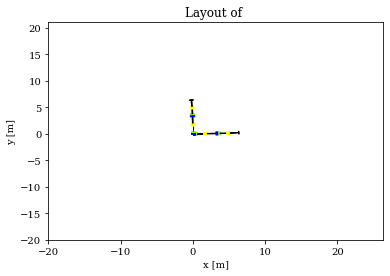

In [48]:
layout= Layout()
# list of [elem_type,x,y,theta,angle,length]
datas=layout_datas(RING)
layout.add_beamline(datas)
RING[0,"thetax"]=3.1415926/2
RING.calc()
datas=layout_datas(RING)
layout.add_beamline(datas)

## Todo
1. matching with linear solve like MADX JACOBIAN method (see MADX matchjc.f90)
2. misalignment calculation
3. FMA calculation
4. tracking with radiation 
5. etc.

In [ ]:
# -*- JACOBIAN linear solve -*-
values,lbs0,ubs0,_ = RING2["VAR"]
best_value = np.array(values )
best_G = np.array(RING2["CONSTRAINT"])
best_F = np.array(RING2["OPTIMIZE"])
best_conv = np.sum(best_G**2)+np.sum(best_F**2)

for j in range(100):
    values,lbs0,ubs0,_ = RING2["VAR"]
    # conv = np.sum(G**2)+np.sum(F**2)
    # if conv<1e-10: break
    # if best_conv > conv: 
    #     best_value = np.array(values )
    #     best_G = G
    #     best_F = F

    X=np.array([values for i in range(len(values)+1) ] )

    delta = 1e-6
    for i in range(len(values)):
        X[i,i]+=delta

    cv =  RING2["CONSTRAINT"] 
    f = RING2["OPTIMIZE"]
    
    G = np.array([cv for i in range(len(values)+1) ] )
    F = np.array([f for i in range(len(values)+1) ] )
    RING2.evolution(X,F,G )
    F1 = np.concatenate((1e20*G,F),axis=1)

    F1[:-1] -= F1[-1]
    F1[:-1] /= delta
    A = F1[:-1].copy().transpose()
    print("j : ",j)
    print(A)
    delta_X = np.linalg.lstsq( A, -F1[-1].copy() )
    # delta_X
    cv,obj=RING2(delta_X[0]+np.array(values))
    print("cv : ",cv)
    print("obj : ",obj)
    if np.sum(cv**2)+np.sum(obj**2)<1e-10: break